## Edge Detection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

1- Read and display the image "lena.png" and convert the image to grayscale.

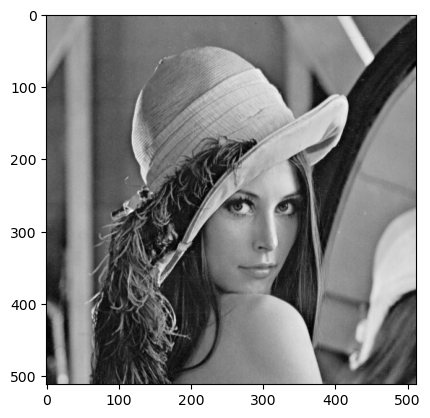

In [2]:
image = cv2.imread("./images/images/lena.png")
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap='gray')


2- For each of the operators "Roberts, Prewitt, and Sobel," calculate and display:

a. The gradient along the lines,

b. The gradient along the columns,

c. The phase of the gradient,

d. The magnitude of the gradient,

In [3]:
# Roberts filter
roberts_x = np.array([[1, 0], [0, -1]])
roberts_y = np.array([[0, 1], [-1, 0]])

gradient_roberts_x = cv2.filter2D(img, -1, roberts_x)
gradient_roberts_y = cv2.filter2D(img, -1, roberts_y)


In [4]:
# Prewitt filter
prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

gradient_prewitt_x = cv2.filter2D(img, -1, prewitt_x)
gradient_prewitt_y = cv2.filter2D(img, -1, prewitt_y)


In [5]:
# Sobel filter
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

phase_sobel = np.arctan2(sobel_y, sobel_x)
magnitude_sobel = np.sqrt(sobel_x ** 2 + sobel_y ** 2)


In [6]:
print(type(sobel_x[0] ** 2))

<class 'numpy.ndarray'>


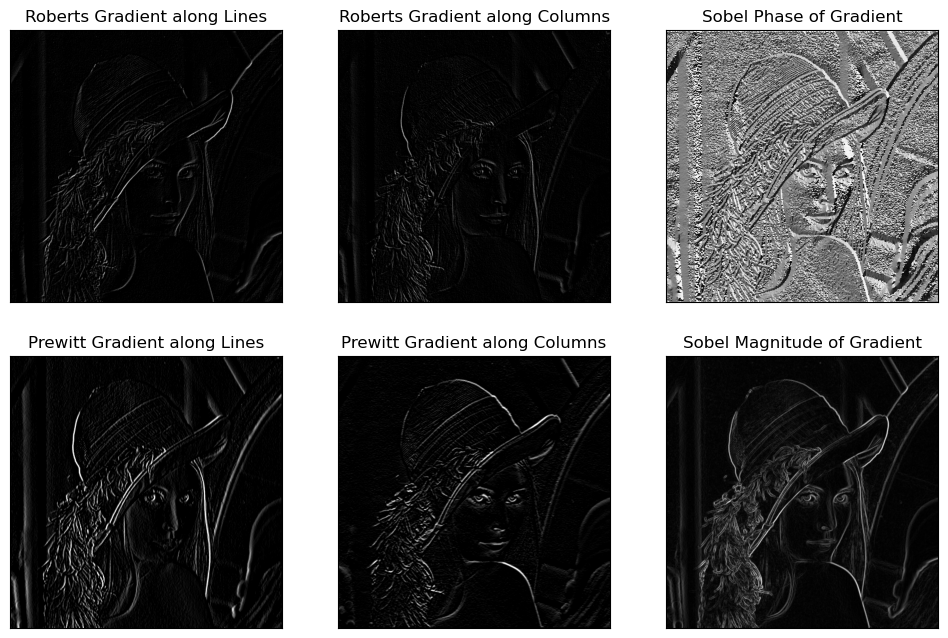

In [7]:
plt.figure(figsize=(12, 12))

plt.subplot(3, 3, 1), plt.imshow(gradient_roberts_x, cmap='gray')
plt.title('Roberts Gradient along Lines'), plt.xticks([]), plt.yticks([])

plt.subplot(3, 3, 2), plt.imshow(gradient_roberts_y, cmap='gray')
plt.title('Roberts Gradient along Columns'), plt.xticks([]), plt.yticks([])

plt.subplot(3, 3, 3), plt.imshow(phase_sobel, cmap='gray')
plt.title('Sobel Phase of Gradient'), plt.xticks([]), plt.yticks([])

plt.subplot(3, 3, 4), plt.imshow(gradient_prewitt_x, cmap='gray')
plt.title('Prewitt Gradient along Lines'), plt.xticks([]), plt.yticks([])

plt.subplot(3, 3, 5), plt.imshow(gradient_prewitt_y, cmap='gray')
plt.title('Prewitt Gradient along Columns'), plt.xticks([]), plt.yticks([])

plt.subplot(3, 3, 6), plt.imshow(magnitude_sobel, cmap='gray')
plt.title('Sobel Magnitude of Gradient'), plt.xticks([]), plt.yticks([])

plt.show()

3- Compare between the 3 operators: ( honestly i cant see th edges bien ) 
- Prewitt is good at detecting edges in images with uniform backgrounds and has a somewhat smoothing effect
- Roberts is simpler compared to Prewitt and Sobel but can be more sensitive to noise and doesnt detect well
- Sobel is widely used and provides good results for edge detection. It is more robust in detecting horizontal and vertical edges in noisy images

4- Take the original image again, calculate and display the Laplacian for 4-connectivity and 8-connectivity. 

In [13]:
# Laplacien 4-connectivity
laplacian_4 = cv2.Laplacian(img, cv2.CV_64F, ksize=1)


In [14]:
# Laplacien 8-connectivity
laplacian_8 = cv2.Laplacian(img, cv2.CV_64F, ksize=3)

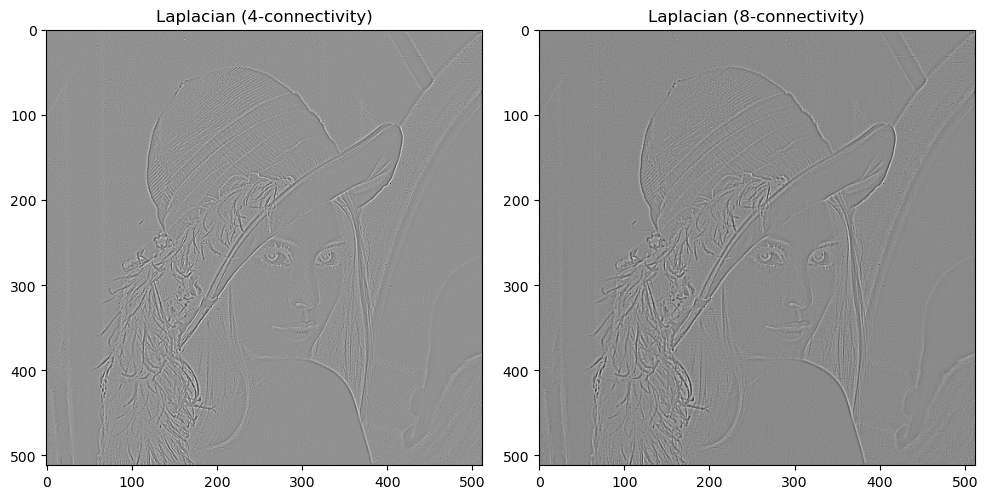

In [15]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1), plt.imshow(laplacian_4, cmap='gray')
plt.title('Laplacian (4-connectivity)')

plt.subplot(1, 2, 2), plt.imshow(laplacian_8, cmap='gray')
plt.title('Laplacian (8-connectivity)')

plt.tight_layout()
plt.show()

5- Compare between the two last

comparison: L-8 is better at detection 
- The Laplacian for 4-connectivity  computes the second derivative with respect to both x and y axes, emphasizing changes in intensity in the horizontal and vertical directions, in the image above it detects but not as well as L8 
- The Laplacian for 8-connectivity uses a 3x3 kernel as well but considers all 8 neighboring pixels (including diagonals). It computes the second derivative in all directions, making it sensitive to changes in intensity along both horizontal, vertical, and diagonal directions,it is more versatile and can detect edges in any direction

6- In order to improve the obtained result, apply Gaussian filtering before calculating the 8-connectivity Laplacian. Display the result.

applying Gaussian filtering before calculating the Laplacian for 8-connectivity can help reduce noise and produce smoother edges.

In [16]:
image_gaussian = cv2.GaussianBlur(img, (5, 5), 0)
laplacian_8g = cv2.Laplacian(image_gaussian, cv2.CV_64F, ksize=3)

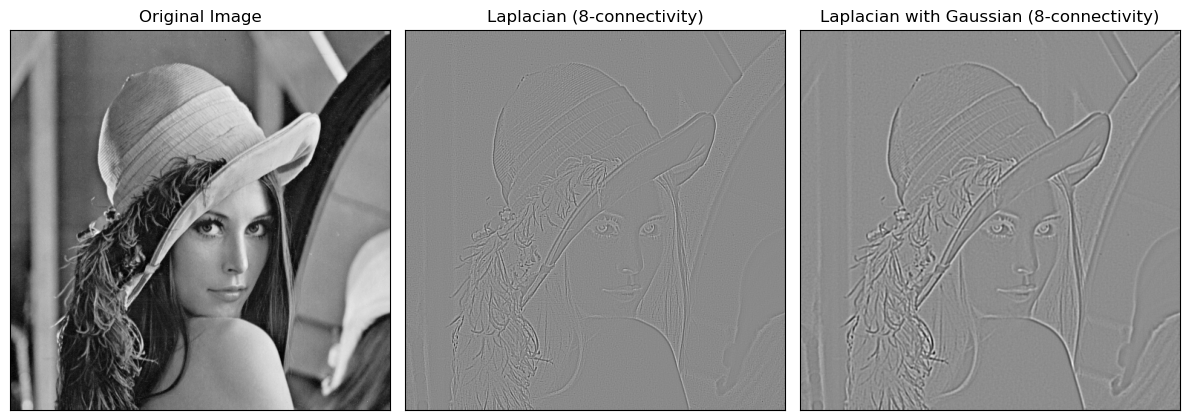

In [17]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2), plt.imshow(laplacian_8, cmap='gray')
plt.title('Laplacian (8-connectivity)'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3), plt.imshow(laplacian_8g, cmap='gray')
plt.title('Laplacian with Gaussian (8-connectivity)'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

It gave better results than before! ( smoothing eliminate the noise and so more emphasing on details ) 

7- Apply the Laplacian enhancement method through thresholding.

In [27]:
thresholded_images = []  # List to store thresholded images

for threshold_value in range(20, 101,20):
    # Apply Laplacian edge detection
    laplacian = cv2.Laplacian(img, cv2.CV_64F, ksize=3)

    # Apply thresholding to emphasize edges
    laplacian_thresholded = np.zeros_like(laplacian)
    laplacian_thresholded[laplacian > threshold_value] = 255  # Pixels above threshold are set to 255 (white)

    thresholded_images.append(laplacian_thresholded)  



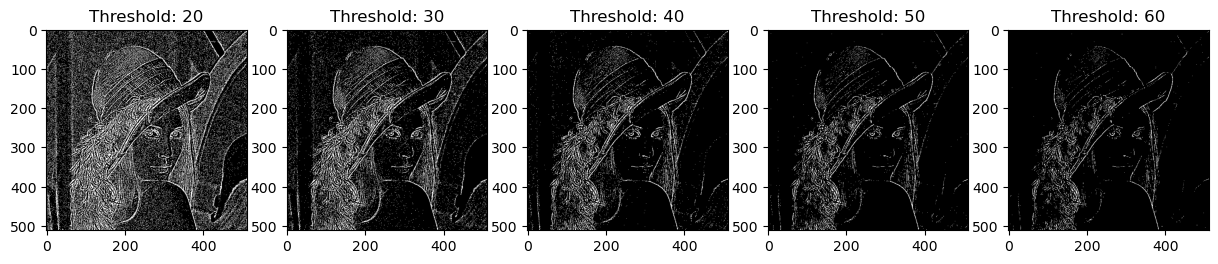

In [28]:
fig, axes = plt.subplots(1, len(thresholded_images), figsize=(15, 5))
for i, thresholded_image in enumerate(thresholded_images):
    axes[i].imshow(thresholded_image, cmap='gray')
    axes[i].set_title(f'Threshold: {i * 10 + 20}')

Commentaire about thresholding , value emprique

8-Compare between the different filters applied for edge detection.

- Comparaison :
- - Gradient-Based Edge Detection (Roberts, Prewitt, Sobel):

- Purpose: These methods compute the gradient magnitude to detect edges by focusing on intensity changes.
- Approach: Use different convolution kernels to approximate the gradient of the image.
- Enhancement Effects: Highlight edges by detecting changes in intensity, providing directional information (horizontal, vertical, or diagonal edges) based on the kernel used.
- Variations:
Roberts: Uses small, simple masks to compute diagonal gradients.
Prewitt: Utilizes larger masks to estimate gradients in horizontal and vertical directions.
Sobel: Similar to Prewitt but uses weighted masks for better noise reduction.

- - Laplacian Edge Detection:

- Purpose: Laplacian edge detection emphasizes regions with rapid intensity changes or discontinuities in the image.
- Approach: Calculates the second derivative of the image to highlight abrupt changes in intensity.
Enhancement Effects: Emphasizes edges and fine details, detecting both strong and weak edges.
- Variations:
- - 4-connectivity / 8-connectivity: Refers to the neighborhood configuration (4 or 8 pixels) considered during edge detection, affecting the connectedness of detected edges.
- - Thresholding: Applies a threshold to the Laplacian response to obtain binary edge maps by distinguishing edges from non-edges.


- Choosing the Right Method:

- - Laplacian: Suitable for detecting edges in various orientations, including both strong and weak edges. It might produce thicker edges and be more sensitive to noise.
- - Gradient-Based: Provide directional information and are more robust to noise, useful when directional edge information is needed.
- Overall:

The choice depends on the application requirements, desired edge characteristics, and the presence of noise. Experimentation and combining methods might provide more robust edge detection in diverse image scenarios.


## Contrast improvement

1. Read and display the image " x "

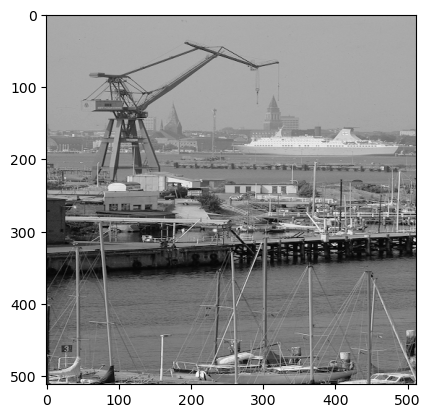

In [78]:
image = cv2.imread("./images/images/kiel.bmp")
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap='gray')

Text(0, 0.5, 'Density')

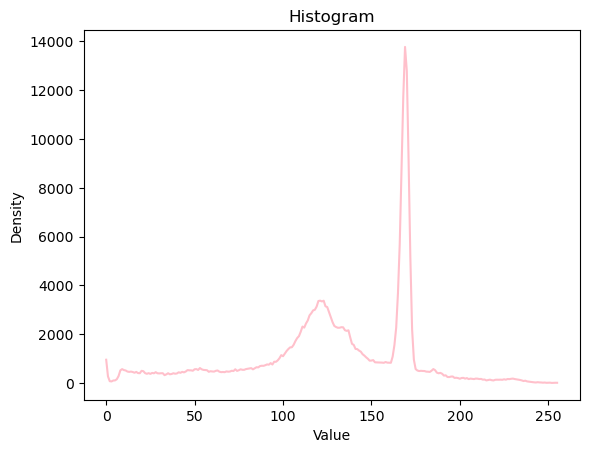

In [79]:
hist = cv2.calcHist([img], [0], None, [256], [0, 256]) 
plt.plot(hist,color='pink')
plt.title('Histogram')
plt.xlabel("Value")
plt.ylabel("Density")

2. Use the three filters introduced in the course in the enhacement section. Comment.

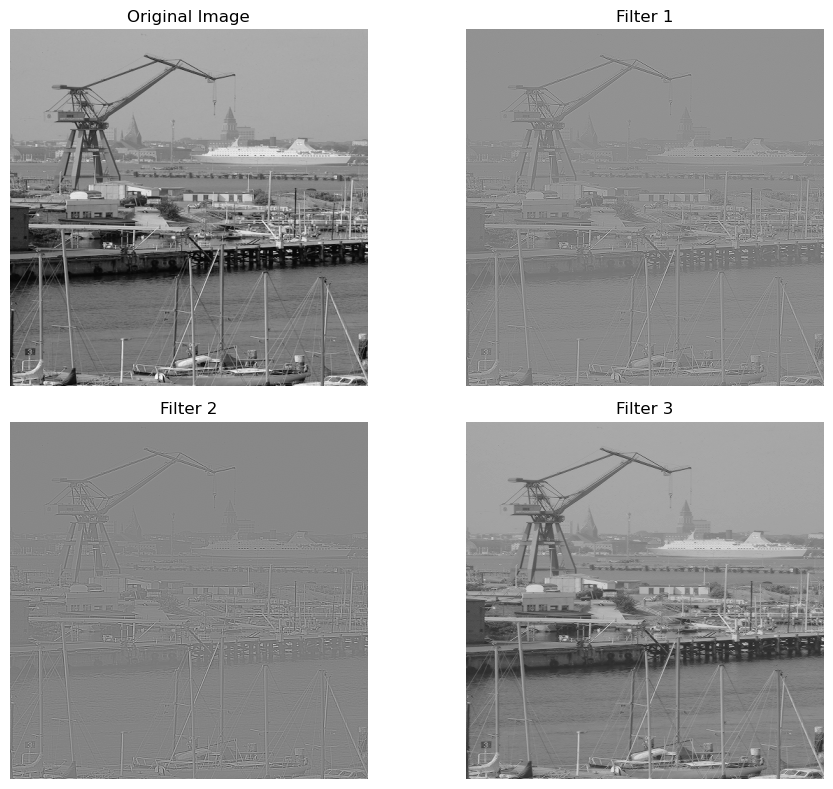

In [4]:
def apply_enhancement_filter(image, the_filter):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    filtered_image = cv2.filter2D(gray_image, cv2.CV_64F, the_filter)

    filtered_image = cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX)

    filtered_image = np.uint8(filtered_image)

    return filtered_image

original_image = cv2.imread("./images/images/kiel.bmp")

filter1 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
filter2 = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
filter3 = np.array([[1, -2, 1], [-1, 11, -1], [1, -2, 1]])

filtered_image1 = apply_enhancement_filter(original_image, filter1)
filtered_image2 = apply_enhancement_filter(original_image, filter2)
filtered_image3 = apply_enhancement_filter(original_image, filter3)

# Display the images using subplots
plt.figure(figsize=(10, 8))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Filter 1
plt.subplot(2, 2, 2)
plt.imshow(filtered_image1, cmap='gray')
plt.title('Filter 1')
plt.axis('off')

# Filter 2
plt.subplot(2, 2, 3)
plt.imshow(filtered_image2, cmap='gray')
plt.title('Filter 2')
plt.axis('off')

# Filter 3
plt.subplot(2, 2, 4)
plt.imshow(filtered_image3, cmap='gray')
plt.title('Filter 3')
plt.axis('off')

plt.tight_layout()
plt.show()


The results are not satisfying !

3. Use a Gamma correction with Gamma = 0.8, 1.2 and 1.0001. Comment.

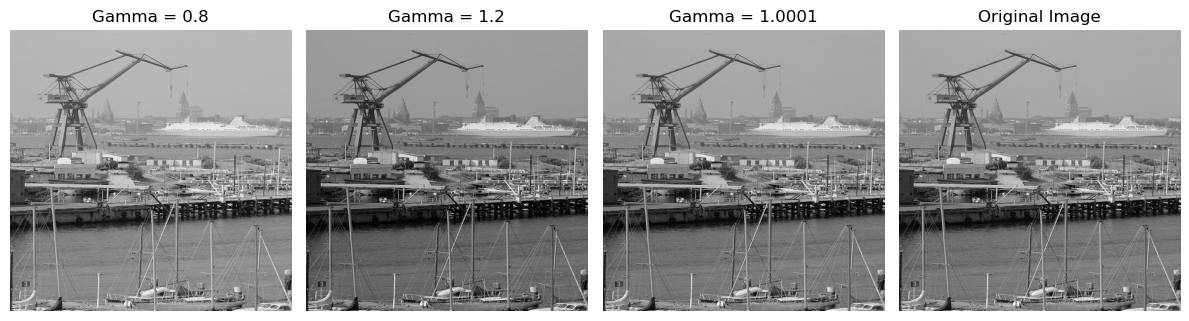

In [88]:
def gamma_correction(image, gamma):
    # Normalize pixel values to [0, 1]
    normalized_image = image / 255.0
    # Apply gamma correction
    corrected_image = np.power(normalized_image, gamma)
    # Scale back to [0, 255]
    corrected_image = (corrected_image * 255).astype(np.uint8)
    return corrected_image

# Apply gamma correction with different gamma values
gamma_values = [0.8, 1.2, 1.0001]

plt.figure(figsize=(12, 4))

for i, gamma in enumerate(gamma_values):
    corrected_img = gamma_correction(img, gamma)
    
    plt.subplot(1, 4, i+1)
    plt.imshow(corrected_img, cmap='gray')
    plt.title(f'Gamma = {gamma}')
    plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.tight_layout()
plt.show()


Gamma correction is a non-linear operation used to alter the brightness and contrast of an image by applying a power-law function to the pixel values. Adjusting the gamma value can either darken or lighten the image and is particularly useful in fine-tuning the midtone values.

In the context of contrast enhancement, using gamma correction with different gamma values, such as 0.8, 1.2, and 1.0001, provides a way to observe how the image's appearance changes:

Gamma < 1 (e.g., 0.8): This value darkens the image, particularly emphasizing darker regions and potentially reducing the overall contrast. It can make details in shadows more pronounced but might lead to loss of details in brighter areas.

Gamma > 1 (e.g., 1.2): This value lightens the image, particularly enhancing the brighter regions and potentially boosting overall contrast. It might emphasize details in highlights but could lead to loss of details in shadows.

Gamma = 1.0001: This is very close to 1, so it represents minimal or no correction. It won't significantly alter the image's contrast or brightness and is almost equivalent to the original image.



4. Choose a piecewise linear transformation to improve the contrast and apply it. Comment.

Piecewise linear transformations involve breaking the range of pixel values into segments and applying linear transformations to each segment individually. This method allows for fine-tuning the contrast by focusing on specific ranges of pixel intensities.

The piecewise linear transformation technique typically involves defining several control points, where each point represents a pivot around which the transformation occurs. By manipulating these points, you can selectively enhance or diminish contrast in different regions of the image.

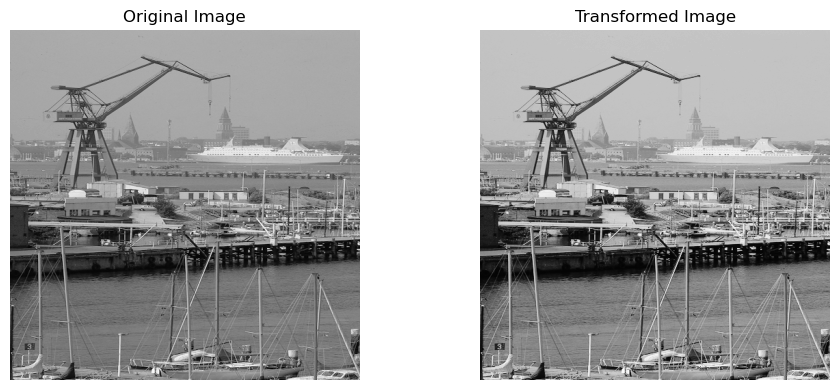

In [89]:
# Define control points for the piecewise linear transformation
control_points = [(0, 0), (50, 30), (150, 180), (255, 255)]

# Perform piecewise linear transformation
def piecewise_linear_transform(image, control_points):
    lut = np.zeros(256, dtype=np.uint8)
    for i in range(len(control_points) - 1):
        x0, y0 = control_points[i]
        x1, y1 = control_points[i + 1]
        slope = (y1 - y0) / (x1 - x0)
        intercept = y0 - slope * x0
        lut[x0:x1] = np.clip(np.round(np.arange(x0, x1) * slope + intercept), 0, 255)
    return cv2.LUT(image, lut)

transformed_img = piecewise_linear_transform(img, control_points)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_img, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.tight_layout()
plt.show()

#### Enhancement in frequency domain 

In enhancement ( Denoising ), frequency domain filters like the ideal, Gaussian, and Butterworth filters ( but in lwo pass ) can be used to modify an image's frequency content, affecting its contrast. These filters can amplify or suppress certain frequency components in the image.

In [80]:
# Fourier transform of the image
f_transform = np.fft.fft2(img)
f_shift = np.fft.fftshift(f_transform)

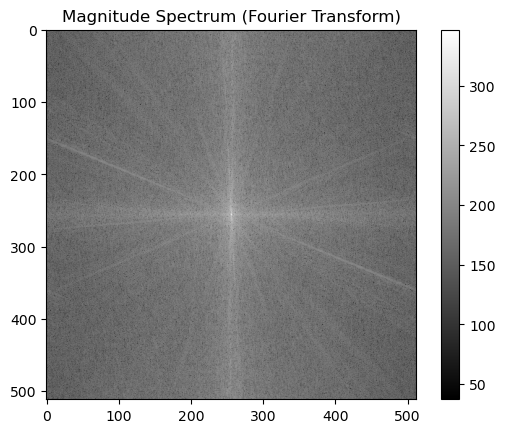

In [81]:
magnitude_spectrum = 20 * np.log(np.abs(f_shift))

# Display the magnitude spectrum (Fourier transform)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum (Fourier Transform)')
plt.colorbar()
plt.show()

In [85]:
# Generate filter masks
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

# Ideal low-pass filter
ideal_lp_mask = np.zeros((rows, cols), np.uint8)
ideal_radius = 100  # Adjust this radius as needed
cv2.circle(ideal_lp_mask, (ccol, crow), ideal_radius, 1, -1)

# Gaussian low-pass filter
sigma = 100 # Adjust sigma as needed
x = np.arange(0, cols, 1)
y = np.arange(0, rows, 1)
x -= int(cols / 2)
y -= int(rows / 2)
xx, yy = np.meshgrid(x, y)
gaussian_lp_mask = np.exp(-(xx ** 2 + yy ** 2) / (2 * sigma ** 2))

# Normalize the Gaussian filter
gaussian_lp_mask /= np.max(gaussian_lp_mask)

# Butterworth low-pass filter
order = 2  # Adjust order as needed
butterworth_lp_mask = np.zeros((rows, cols), np.float32)
for i in range(rows):
    for j in range(cols):
        distance = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
        butterworth_lp_mask[i, j] = 1 / (1 + (distance / ideal_radius) ** (2 * order))

# Normalize the Butterworth filter
butterworth_lp_mask /= np.max(butterworth_lp_mask)


In [86]:
# Apply the filters in the frequency domain
f_shift_ideal = f_shift * ideal_lp_mask
f_shift_gaussian = f_shift * gaussian_lp_mask
f_shift_butterworth = f_shift * butterworth_lp_mask

# Transform the filtered images back to spatial domain
ideal_filtered = np.fft.ifftshift(f_shift_ideal)
ideal_filtered = np.fft.ifft2(ideal_filtered)
ideal_filtered = np.abs(ideal_filtered)

gaussian_filtered = np.fft.ifftshift(f_shift_gaussian)
gaussian_filtered = np.fft.ifft2(gaussian_filtered)
gaussian_filtered = np.abs(gaussian_filtered)

butterworth_filtered = np.fft.ifftshift(f_shift_butterworth)
butterworth_filtered = np.fft.ifft2(butterworth_filtered)
butterworth_filtered = np.abs(butterworth_filtered)


The issue might be related to the mask values for the Gaussian and Butterworth filters. The mask values should be in the range of 0 to 1 to properly modulate the Fourier spectrum.

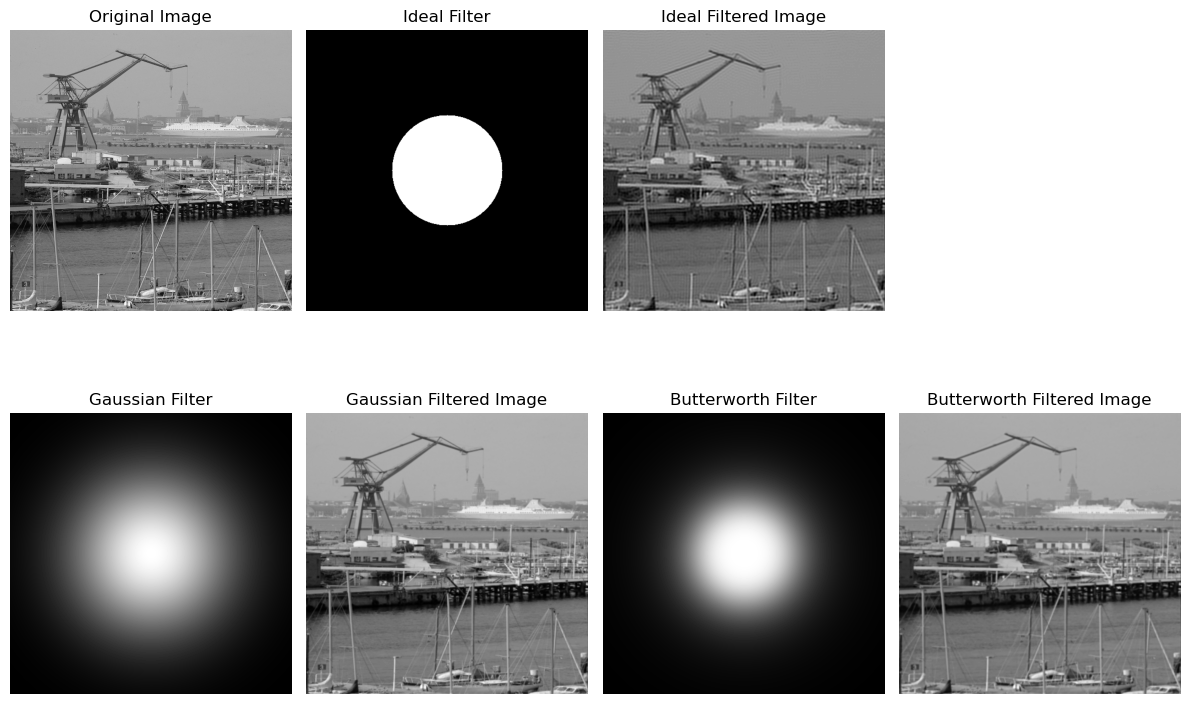

In [87]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.axis('off')

plt.subplot(2, 4, 2), plt.imshow(ideal_lp_mask, cmap='gray')
plt.title('Ideal Filter'), plt.axis('off')

plt.subplot(2, 4, 3), plt.imshow(ideal_filtered, cmap='gray')
plt.title('Ideal Filtered Image'), plt.axis('off')

plt.subplot(2, 4, 5), plt.imshow(gaussian_lp_mask, cmap='gray')
plt.title('Gaussian Filter'), plt.axis('off')

plt.subplot(2, 4, 6), plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Filtered Image'), plt.axis('off')

plt.subplot(2, 4, 7), plt.imshow(butterworth_lp_mask, cmap='gray')
plt.title('Butterworth Filter'), plt.axis('off')

plt.subplot(2, 4, 8), plt.imshow(butterworth_filtered, cmap='gray')
plt.title('Butterworth Filtered Image'), plt.axis('off')

plt.tight_layout()
plt.show()

5. Compare between the different methods applied for image enhacement.

Frequency Domain Filters (Ideal, Gaussian, Butterworth):

- Ideal filters produce sharp cutoffs but suffer from ringing artifacts.
- Gaussian filters provide a smoother transition from pass to stop regions, reducing artifacts but might blur details.
- Butterworth filters offer control over the filter's sharpness, balancing between sharpness and smoothness.

Gamma Correction:

Adjusting gamma values impacts the image's brightness and contrast. Lower values darken the image, while higher values lighten it.
Gamma correction is effective for adjusting overall brightness but may not provide fine-tuned control for specific regions.
- Piecewise Linear Transformation:

Allows selective contrast adjustment by defining control points.
Provides flexibility in enhancing or diminishing contrast in specific intensity ranges.
Overall Considerations:

- - Drawbacks : 
- Ideal filters exhibit sharpness but introduce artifacts, while Gaussian and Butterworth filters offer smoother transitions with varying degrees of sharpness.
- Gamma correction is suitable for overall contrast adjustments but lacks targeted control for specific intensity ranges.
- Piecewise linear transformation enables fine-tuning contrast in specific intensity segments but may require careful control point selection.

In conclusion, the choice of an enhancement method depends on the image's characteristics and the desired outcome. Experimentation and a combination of methods may yield the best results, utilizing each method's strengths to achieve the desired contrast enhancement while minimizing potential artifacts or loss of details.

## Filtering in frequency domain


1. Read and display the image "goldhill.bmp." and onvert the image to grayscale.

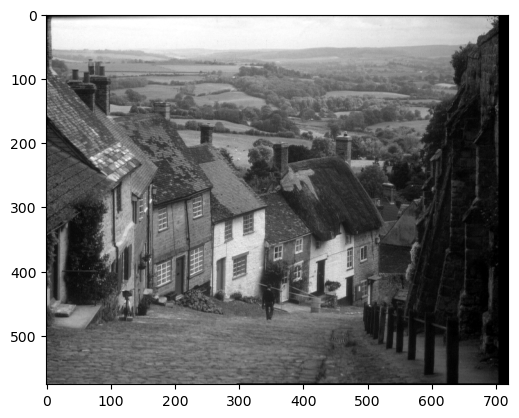

In [60]:
image = cv2.imread("./images/images/goldhill.bmp")
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap='gray')
#we have to use noisy image 

2. Add Gaussian noise to the image with a mean of zero and a standard deviation of σ = 0.01.

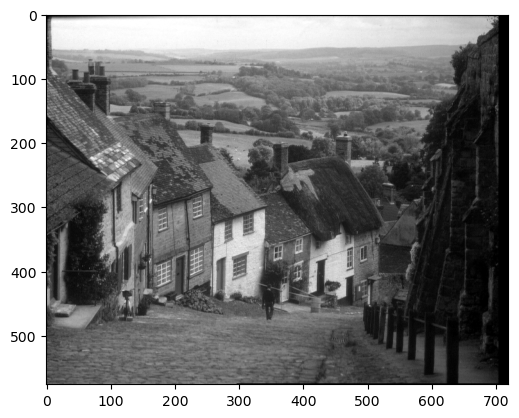

In [61]:
mean = 0
sigma = 0.01
gaussian_noise = np.random.normal(mean, sigma, img.shape)
image_with_noise = img + gaussian_noise
plt.imshow(image_with_noise,cmap='gray')

3. Calculate the discrete Fourier transform of the image using the functions np.fft (search for it) .

np.fft.fft2 function to compute the 2-dimensional discrete Fourier transform (DFT) of an image.

In [62]:
dft = np.fft.fft2(img)
dft_shifted = np.fft.fftshift(dft)  # Shift the zero-frequency component to the center

4. Display the spectrum of the image.

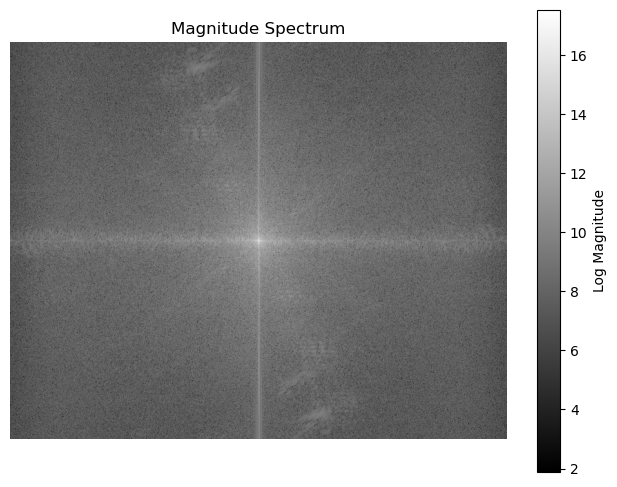

In [63]:
magnitude_spectrum = np.abs(dft_shifted)

plt.figure(figsize=(8, 6))
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.title('Magnitude Spectrum'), plt.axis('off')
plt.colorbar(label='Log Magnitude')
plt.show()

5. Generate and display the transfer function of the filter H, which is a low pass filter having a cutting frequency D0=40.

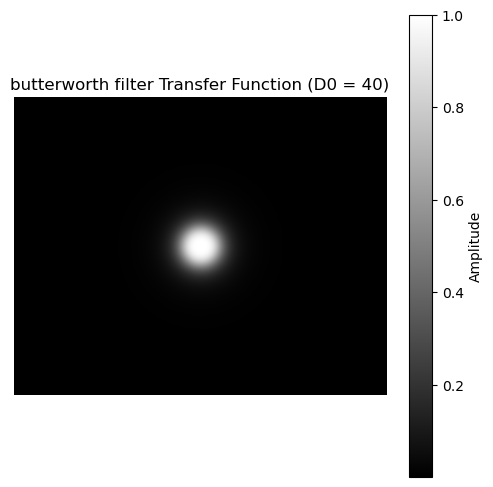

In [67]:
def butterworth_low_pass(shape, d_0, n):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2

    # Create a grid of distances from the center
    x = np.arange(cols) - ccol
    y = np.arange(rows) - crow
    X, Y = np.meshgrid(x, y)
    distance_from_center = np.sqrt(X**2 + Y**2)

    # Generate the Butterworth low-pass filter mask
    butterworth_mask = 1 / (1 + (distance_from_center / d_0)**(2 * n))
    return butterworth_mask

D0 = 40  # Cutoff frequency
order = 2  # Order of the Butterworth filter

# Create an low-pass filter mask
image_shape = img.shape
butterworth_filter = butterworth_low_pass(image_shape, D0, order)

# Display the transfer function of the butterworth low-pass filter
plt.figure(figsize=(6, 6))
plt.imshow(butterworth_filter, cmap='gray')
plt.title(f'butterworth filter Transfer Function (D0 = {D0})')
plt.axis('off')
plt.colorbar(label='Amplitude')
plt.show()

6. Filter the spectrum of the image using the function previously generated (H).

- Computes the 2D discrete Fourier transform of the image.
- Generates the ideal low-pass filter H using the previously defined function.
- Applies the filter mask H to the shifted Fourier transform of the image.
- Performs inverse Fourier transform to obtain the filtered image.

In [68]:
# Apply the filter to the image spectrum
filtered_spectrum = dft_shifted * butterworth_filter

# Inverse shift to bring the zero-frequency component back to the top-left
filtered_spectrum_shifted = np.fft.ifftshift(filtered_spectrum)


7. Reconstruct the image (filtered one ofc) and display it.

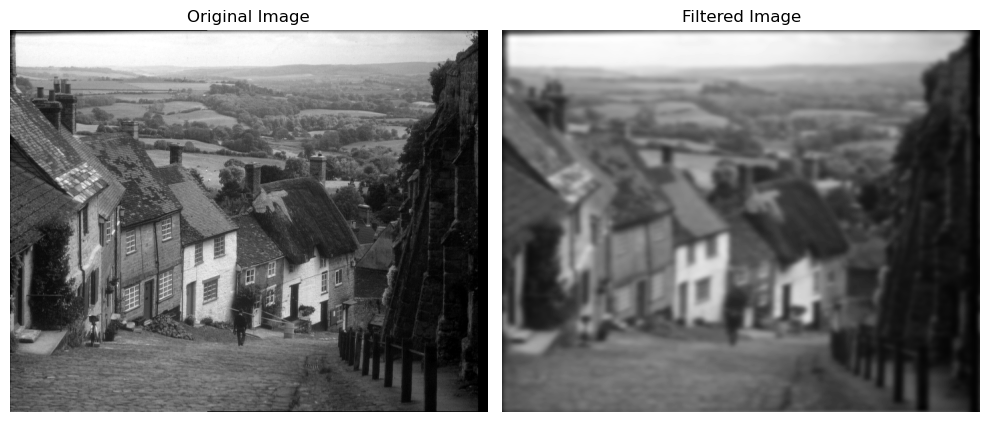

In [69]:
# Inverse Fourier transform to get the filtered image
filtered_image = np.fft.ifft2(filtered_spectrum_shifted)
filtered_image = np.abs(filtered_image)

# Display the filtered image
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image'), plt.axis('off')

plt.tight_layout()
plt.show()

8. Apply a high pass filter following the same steps.

C:\Users\PC\AppData\Local\Temp\ipykernel_25472\139487313.py:12: RuntimeWarning: divide by zero encountered in divide
  butterworth_mask = 1 / (1 + (d_0 / distance_from_center)**(2 * n))


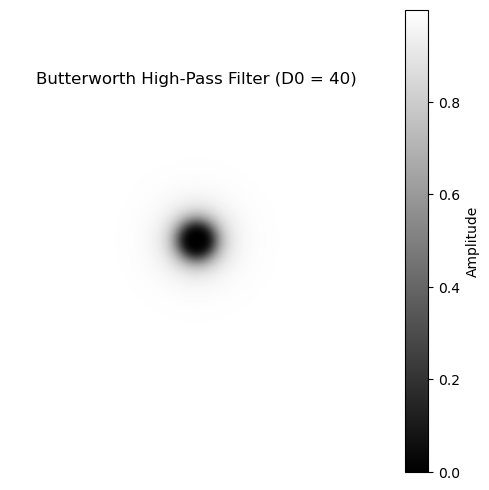

In [70]:
def butterworth_high_pass(shape, d_0, n):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2

    # Create a grid of distances from the center
    x = np.arange(cols) - ccol
    y = np.arange(rows) - crow
    X, Y = np.meshgrid(x, y)
    distance_from_center = np.sqrt(X**2 + Y**2)

    # Generate the Butterworth high-pass filter mask
    butterworth_mask = 1 / (1 + (d_0 / distance_from_center)**(2 * n))
    return butterworth_mask

# Cutoff frequency and order of the Butterworth filter
D0 = 40  # Cutoff frequency
order = 2  # Order of the Butterworth filter

# Create a high-pass filter mask
image_shape = img.shape
butterworth_filter = butterworth_high_pass(image_shape, D0, order)

# Display the transfer function of the Butterworth high-pass filter
plt.figure(figsize=(6, 6))
plt.imshow(butterworth_filter, cmap='gray')
plt.title(f'Butterworth High-Pass Filter (D0 = {D0})')
plt.axis('off')
plt.colorbar(label='Amplitude')
plt.show()


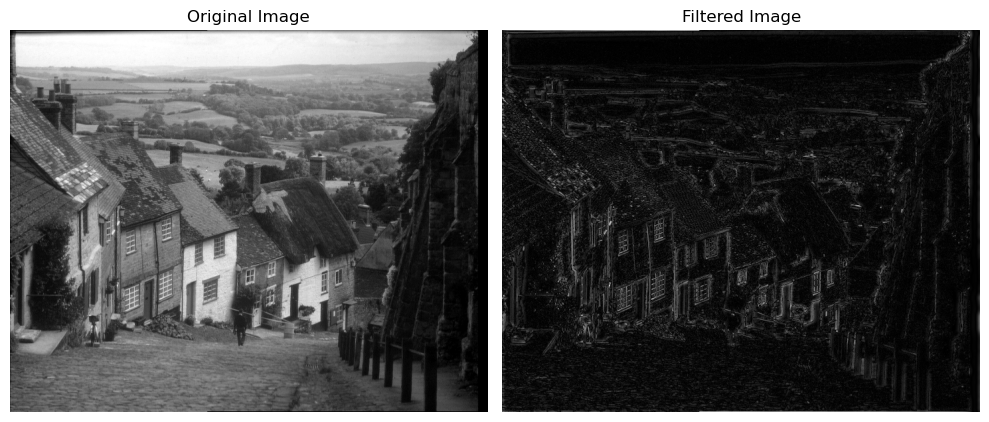

In [71]:
# Perform Fourier transform
f_transform = np.fft.fft2(img)
f_shift = np.fft.fftshift(f_transform)

# Apply the filter to the image spectrum
filtered_spectrum = f_shift * butterworth_filter

# Inverse shift to bring the zero-frequency component back to the top-left
filtered_spectrum_shifted = np.fft.ifftshift(filtered_spectrum)

# Inverse Fourier transform to get the filtered image
filtered_image = np.fft.ifft2(filtered_spectrum_shifted)
filtered_image = np.abs(filtered_image)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()


9. Perform a bandpass filtering following the same steps.

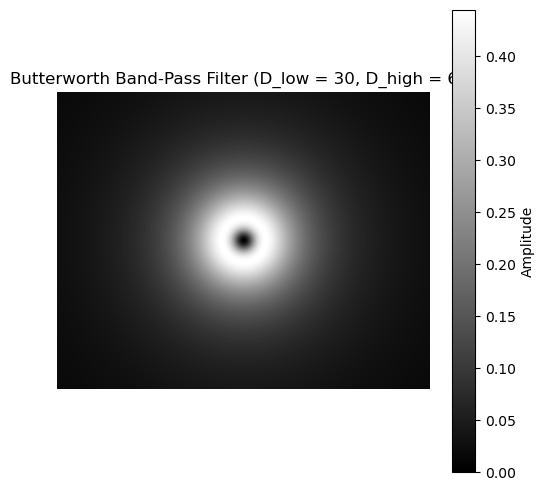

In [76]:
def butterworth_band_pass(shape, d_low, d_high, n):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2

    # Create a grid of distances from the center
    x = np.arange(cols) - ccol
    y = np.arange(rows) - crow
    X, Y = np.meshgrid(x, y)
    distance_from_center = np.sqrt(X**2 + Y**2)

    # Generate the Butterworth band-pass filter mask
    band_pass_mask = (1 / (1 + ((distance_from_center * distance_from_center) / (d_high * d_high))) *
                      (1 - 1 / (1 + ((distance_from_center * distance_from_center) / (d_low * d_low)))) )
    return band_pass_mask

D_low = 30  # Lower cutoff frequency
D_high = 60  # Upper cutoff frequency
order = 2  # Order of the Butterworth filter

# Create a band-pass filter mask
image_shape = img.shape
butterworth_band_pass_filter = butterworth_band_pass(image_shape, D_low, D_high, order)

# Display the transfer function of the Butterworth band-pass filter
plt.figure(figsize=(6, 6))
plt.imshow(butterworth_band_pass_filter, cmap='gray')
plt.title(f'Butterworth Band-Pass Filter (D_low = {D_low}, D_high = {D_high})')
plt.axis('off')
plt.colorbar(label='Amplitude')
plt.show()


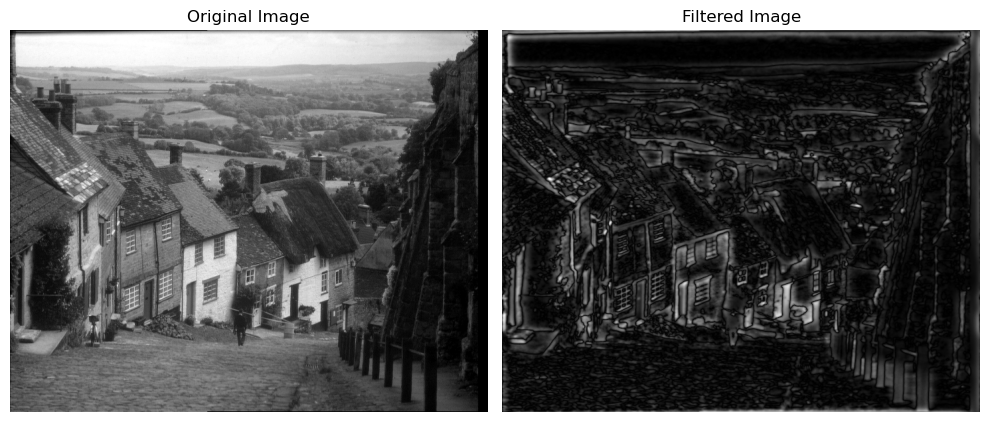

In [77]:
# Perform Fourier transform
f_transform = np.fft.fft2(img)
f_shift = np.fft.fftshift(f_transform)

# Apply the filter to the image spectrum
filtered_spectrum = f_shift * butterworth_band_pass_filter

# Inverse shift to bring the zero-frequency component back to the top-left
filtered_spectrum_shifted = np.fft.ifftshift(filtered_spectrum)

# Inverse Fourier transform to get the filtered image
filtered_image = np.fft.ifft2(filtered_spectrum_shifted)
filtered_image = np.abs(filtered_image)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()


10. Comment the results.

The difference between the three filters :


- Low-Pass Filters:

- - Purpose: Low-pass filters allow low-frequency components (slow changes) while attenuating high-frequency components (rapid changes) in the image.
- - Enhancement Effects: Enhances smoother regions, blurs or reduces noise, and improves global contrast by preserving low-frequency details such as large structures or gradients.
- - Applications: Useful for noise reduction, smoothing, and overall contrast enhancement.

- High-Pass Filters:

- - Purpose: High-pass filters allow high-frequency components while attenuating low-frequency components in the image.
- - Enhancement Effects: Emphasizes fine details, edges, and textures by enhancing high-frequency information, but may increase noise or amplify artifacts.
- -Applications: Edge enhancement, sharpening, and emphasizing fine details or textures.

- Bandpass Filters:

- --Purpose: Bandpass filters allow a specific range of frequencies (bandwidth) while attenuating frequencies outside that range.
- - Enhancement Effects: Highlights details within a specific frequency range, suppressing both low and high-frequency components outside the defined band. Useful for highlighting features within a certain range of sizes or frequencies.
- - Applications: Highlighting specific details within a defined frequency range, such as in image analysis tasks focused on a particular scale or texture.

- General Considerations:

- - Low-pass filters are effective for noise reduction and global contrast enhancement but might smooth out important details.
- - High-pass filters are useful for edge enhancement and detail sharpening but can amplify noise or artifacts.
- - Bandpass filters are beneficial for highlighting specific features within a particular frequency range, useful for tasks requiring focus on certain scales or textures.

- Choosing the Right Filter:

The choice of filter depends on the image's characteristics and the specific enhancement goals.
Often, a combination of filters or a multi-scale approach (using multiple filters at different scales) may provide a more comprehensive enhancement, balancing noise reduction, detail enhancement, and overall contrast improvement.